In [1]:
import numpy as  np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import warnings 
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#sample = pd.read_csv('/content/sample_submission.csv')
#sample

In [3]:
df = pd.read_csv(r'C:\Users\minal\Downloads\quora-question-pairs\train.csv\train.csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
missing_question1 = df['question1'].isnull().sum()
missing_question2 = df['question2'].isnull().sum()

print("Missing values in question1:", missing_question1)
print("Missing values in question2:", missing_question2)

df['question1'].fillna('', inplace=True)
df['question2'].fillna('', inplace=True)

Missing values in question1: 1
Missing values in question2: 2


In [8]:
df.isnull().sum() #resolved

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

<Axes: xlabel='is_duplicate'>

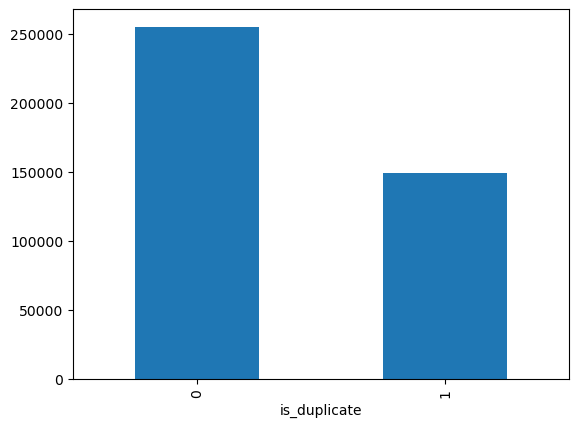

In [9]:
df.is_duplicate.value_counts().plot(kind='bar')


In [10]:
non_similar = (df['is_duplicate'].value_counts()[0] / df.shape[0] ) * 100
similar = (df['is_duplicate'].value_counts()[1] / df.shape[0] ) * 100
print("Questions pair which are not similiar: {}".format(non_similar))
print("Questions pair which are similiar: {}".format(similar))

Questions pair which are not similiar: 63.08021469737069
Questions pair which are similiar: 36.9197853026293


In [11]:
max_rep = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique = len(np.unique(max_rep))
rep = sum(max_rep.value_counts() > 1)
print("Total number of unique questions: {}".format(unique))
print("Numbr of questions that repeated: {}".format(rep))
print("Max Count that a question repeated: {}".format(max(max_rep.value_counts())))

Total number of unique questions: 537933
Numbr of questions that repeated: 111780
Max Count that a question repeated: 157


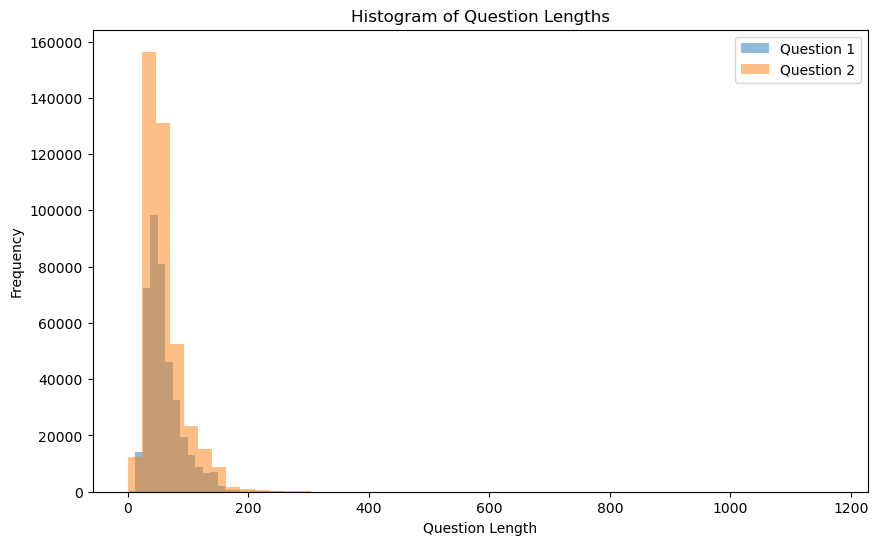

In [12]:
import matplotlib.pyplot as plt

df['question1_length'] = df['question1'].apply(lambda x: len(x))
df['question2_length'] = df['question2'].apply(lambda x: len(x))

plt.figure(figsize=(10, 6))
plt.hist(df['question1_length'], bins=50, alpha=0.5, label='Question 1')
plt.hist(df['question2_length'], bins=50, alpha=0.5, label='Question 2')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('Histogram of Question Lengths')
plt.legend()
plt.show()

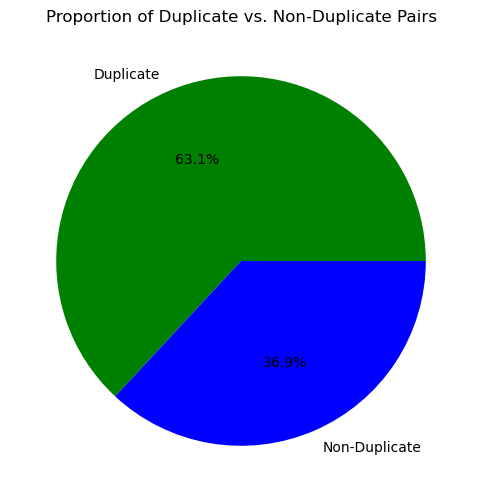

In [13]:
duplicate_counts = df['is_duplicate'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(duplicate_counts, labels=['Duplicate', 'Non-Duplicate'], autopct='%1.1f%%', colors=['green', 'blue'])
plt.title('Proportion of Duplicate vs. Non-Duplicate Pairs')
plt.show()

In [14]:
def text_preprocessing(text):
    tokens = word_tokenize(text)

    tokens = [token.lower() for token in tokens]

    tokens = [token for token in tokens if token not in string.punctuation]

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

df['question1'] = df['question1'].apply(text_preprocessing)
df['question2'] = df['question2'].apply(text_preprocessing)


In [15]:
df.drop(['id', 'qid1', 'qid2'], axis=1, inplace=True)

In [16]:
y = df.pop('is_duplicate')

In [17]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

xtrain, xtest, ytrain, ytest = train_test_split(df, y, test_size=0.2, random_state=42)

sentences_q1 = xtrain['question1'].apply(str.split).tolist()
sentences_q2 = xtrain['question2'].apply(str.split).tolist()
sentences = sentences_q1 + sentences_q2

word2vec_model = Word2Vec(sentences, min_count=1)

def question_to_vector(question, model):
    words = question.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

xtrain_vectors_q1 = np.array([question_to_vector(q, word2vec_model) for q in xtrain['question1']])
xtrain_vectors_q2 = np.array([question_to_vector(q, word2vec_model) for q in xtrain['question2']])
xtest_vectors_q1 = np.array([question_to_vector(q, word2vec_model) for q in xtest['question1']])
xtest_vectors_q2 = np.array([question_to_vector(q, word2vec_model) for q in xtest['question2']])

xtrain_combined = np.concatenate((xtrain_vectors_q1, xtrain_vectors_q2), axis=1)
xtest_combined = np.concatenate((xtest_vectors_q1, xtest_vectors_q2), axis=1)


In [19]:
l = LogisticRegression()
l.fit(xtrain_combined, ytrain)
ypred = l.predict(xtest_combined)

accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)


Accuracy: 0.7169976996710282


In [22]:
test = pd.read_csv(r'C:\Users\minal\Downloads\quora-question-pairs\test.csv')
test

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
2345791,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
2345792,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2345793,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
2345794,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [1]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

test['question1'] = test['question1'].apply(text_preprocessing)
test['question2'] = test['question2'].apply(text_preprocessing)

test = test.head(400)

test_q1 = vectorizer.fit_transform(test['question1'])
test_q2 = vectorizer.transform(test['question2'])
test_combined = np.concatenate((test_q1.toarray(), test_q2.toarray()), axis=1)


l = LogisticRegression()
l.fit(xtrain, ytrain)
test_pred = l.predict(test_combined)

d = {
    'ids': test['test_id'],
    'is_duplicate': test_pred
}

sub = pd.DataFrame(d)

sub.to_csv('my_sample_submission.csv', index=False)

NameError: name 'test' is not defined